In [178]:
%matplotlib inline  

import pandas
import numpy as np

In [179]:
initial_frame = pandas.read_pickle("full_df_v2.pkl")

In [180]:
area = ['garagetotalsqft', 'lotsizesquarefeet', 'poolsizesum', 'yardbuildingsqft17', 'yardbuildingsqft26']

In [181]:
# Apply log to area
for label in area:
    initial_frame[label] = np.log(1 + initial_frame[label])

In [182]:
# FIPS convert to int and subtract 6000 because all values are of same state
initial_frame['fips'] = initial_frame['fips'].astype(int) - 6000

In [183]:
# Delete rawcensusandtractblock because it is identical to censustractandblock
del initial_frame['rawcensustractandblock']

In [184]:
# Take ratio with total living area
ratio_with_area = ['basementsqft', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet6', 'finishedsquarefeet13', 'finishedsquarefeet50', 'garagetotalsqft']

for label in ratio_with_area:
    initial_frame[label] = initial_frame[label]/initial_frame['finishedsquarefeet12']
    

In [185]:
# Take ratio with number of bedrooms
ratio_with_bedroomcnt = ['bathroomcnt', 'calculatedbathnbr', 'threequarterbathnbr', 'fullbathcnt']

for label in ratio_with_bedroomcnt:
    initial_frame[label] = initial_frame[label]/initial_frame['bedroomcnt']

In [186]:
# Make longitude positive
initial_frame['longitude'] = initial_frame['longitude'].astype(int) + 120000000

In [187]:
# Scale latitude
initial_frame['latitude'] = initial_frame['latitude'].astype(int) - 30000000

In [188]:
min_lat = initial_frame.latitude.min()
max_lat = initial_frame.latitude.max()
min_long = initial_frame.longitude.min()
max_long = initial_frame.longitude.max()

lat_res = (max_lat - min_lat)/1000
long_res = (max_long - min_long)/1000

initial_frame = initial_frame.assign(geo_id = lambda x: (x.longitude/long_res) * lat_res + (x.latitude/lat_res)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0065a50d50>]], dtype=object)

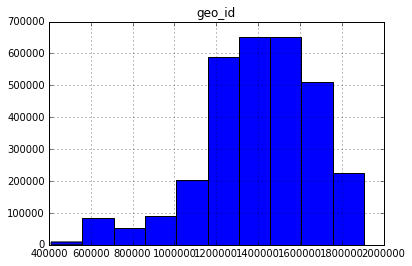

In [189]:
initial_frame.hist(column='geo_id')

In [190]:
initial_frame.to_pickle('df_engineered.pkl')